Problem:1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. 
This survey was conducted on 1525 voters with 9 variables. 
You have to build a model, to predict which party a voter will vote for on the basis of the given information, 
to create an exit poll that will help in predicting overall win and seats covered by a particular party.



In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
datadic=pd.read_excel("Election_Data.xlsx")

In [3]:
datadic

,**Data Dictionary**
0,NaN
1,1. vote: Party choice: Conservative or Labour
2,NaN
3,2. age: in years
4,NaN
5,3. economic.cond.national: Assessment of curre...
6,NaN
7,4. economic.cond.household: Assessment of curr...
8,NaN
9,"5. Blair: Assessment of the Labour leader, 1 t..."


In [4]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)


In [5]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [6]:
election.tail(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1516,Conservative,82,2,2,2,1,11,2,female
1517,Labour,30,3,4,4,2,4,2,male
1518,Labour,76,4,3,2,2,11,2,male
1519,Labour,50,3,4,4,2,5,2,male
1520,Conservative,35,3,4,4,2,8,2,male
1521,Conservative,67,5,3,2,4,11,3,male
1522,Conservative,73,2,2,4,4,8,2,male
1523,Labour,37,3,3,5,4,2,2,male
1524,Conservative,61,3,3,1,4,11,2,male
1525,Conservative,74,2,3,2,4,11,0,female


In [7]:
election.shape

(1525, 9)

In [8]:
election.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [10]:
election.duplicated().sum()

8

In [11]:
election[election.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


In [12]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [13]:
election['vote']=np.where(election['vote'] =='Labour', 0, election['vote'])
election['vote']=np.where(election['vote'] =='Conservative', 1, election['vote'])
election['gender']=np.where(election['gender'] =='male', 1, election['gender'])
election['gender']=np.where(election['gender'] =='female', 0, election['gender'])


In [14]:
election['vote'] = election['vote'].astype(int)
election['gender'] = election['gender'].astype(int)

In [15]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int64
dtypes: int64(9)
memory usage: 119.1 KB


In [16]:
election

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,0,43,3,3,4,1,2,2,0
2,0,36,4,4,4,4,5,2,1
3,0,35,4,4,5,2,3,2,1
4,0,24,4,2,2,1,4,0,0
5,0,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1521,1,67,5,3,2,4,11,3,1
1522,1,73,2,2,4,4,8,2,1
1523,0,37,3,3,5,4,2,2,1
1524,1,61,3,3,1,4,11,2,1


In [17]:
print('Vote\n',election['vote'].value_counts())
print('\n')
print('Age\n',election['age'].value_counts())
print('\n')
print('Economic.cond.national\n',election['economic.cond.national'].value_counts())
print('\n')
print('Economic.cond.household\n',election['economic.cond.household'].value_counts())
print('\n')
print('Blair\n',election['Blair'].value_counts())
print('\n')
print('Hague\n',election['Hague'].value_counts())
print('\n')
print('Europe\n',election['Europe'].value_counts())
print('\n')
print('Political.knowledge\n',election['political.knowledge'].value_counts())
print('\n')
print('Gender\n',election['gender'].value_counts())



Vote
 0    1063
1     462
Name: vote, dtype: int64


Age
 37    42
49    39
35    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: age, Length: 70, dtype: int64


Economic.cond.national
 3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64


Economic.cond.household
 3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


Blair
 4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64


Hague
 2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64


Europe
 11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64


Political.knowledge
 2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64


Gender
 0    812
1    713
Name: gender, dtype: int64


In [18]:
election.skew()


vote                       0.858449
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
gender                     0.130239
dtype: float64

Data Visualization

Univariate Analysis

<Axes: xlabel='vote', ylabel='count'>

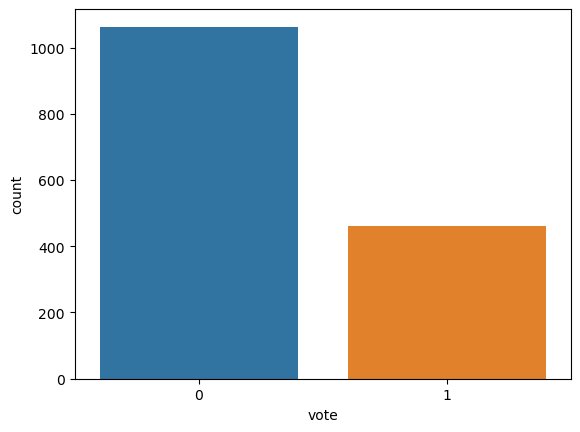

In [19]:
sns.countplot(x='vote', data=election)

<Axes: xlabel='age'>

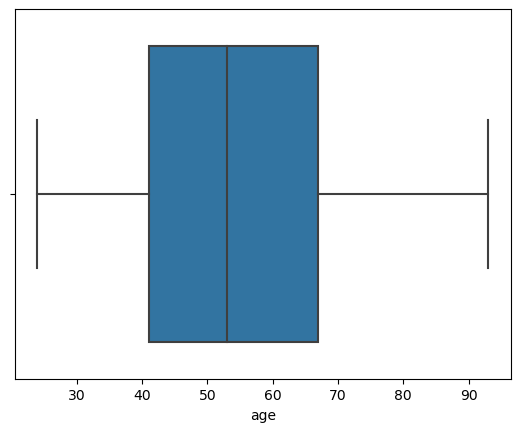

In [20]:
sns.boxplot(x='age', data=election)

<Axes: xlabel='economic.cond.national', ylabel='count'>

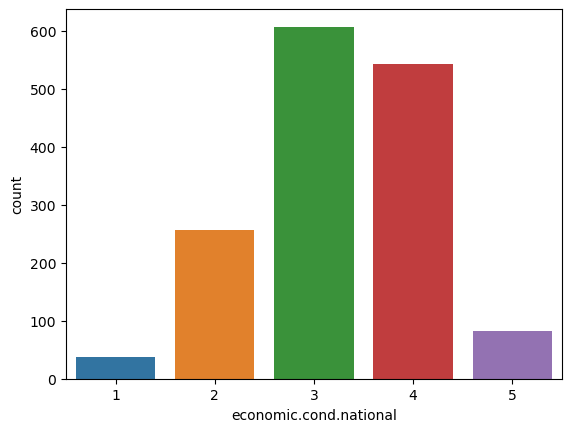

In [21]:
sns.countplot(x='economic.cond.national', data=election)

<Axes: xlabel='economic.cond.household', ylabel='count'>

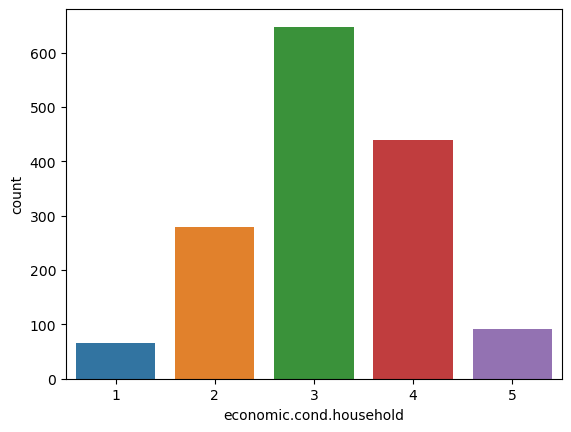

In [22]:
sns.countplot(x='economic.cond.household', data=election)


<Axes: xlabel='Blair', ylabel='count'>

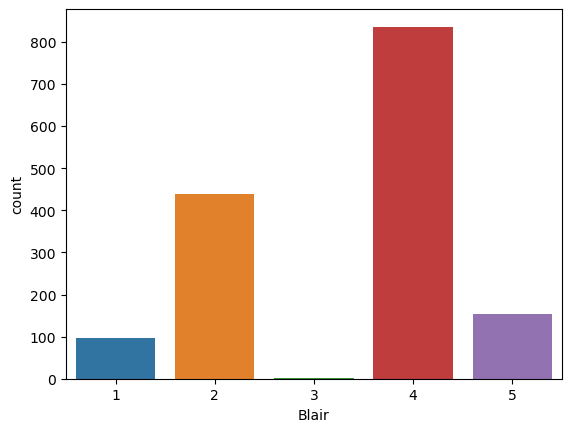

In [23]:
sns.countplot(x='Blair', data=election)


<Axes: xlabel='Hague', ylabel='count'>

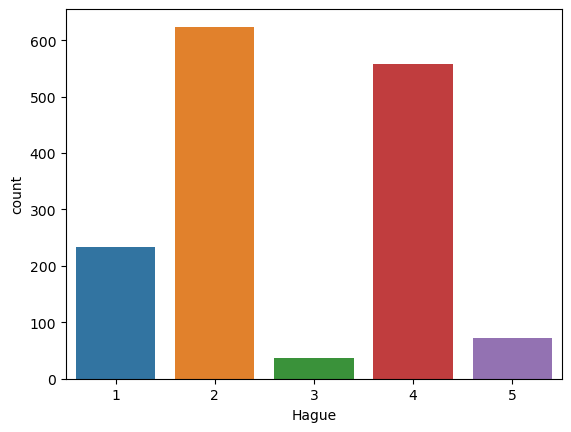

In [24]:
sns.countplot(x='Hague', data=election)


<Axes: xlabel='Europe', ylabel='count'>

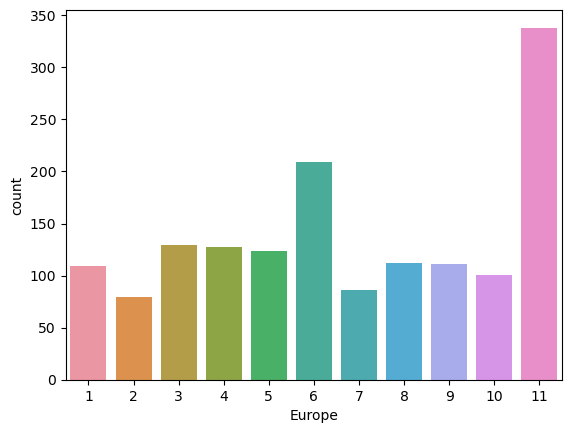

In [25]:
sns.countplot(x='Europe', data=election)


<Axes: xlabel='political.knowledge', ylabel='count'>

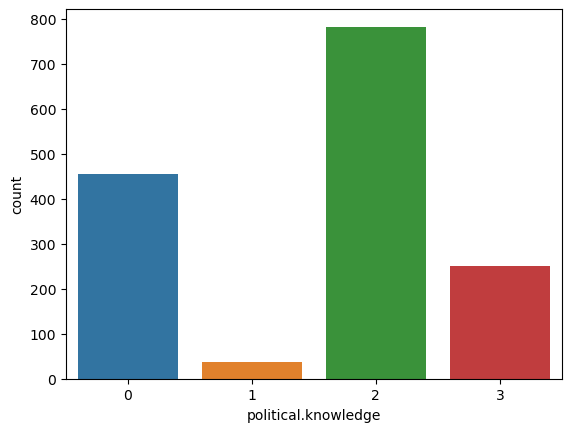

In [26]:
sns.countplot(x='political.knowledge', data=election)


<Axes: xlabel='gender', ylabel='count'>

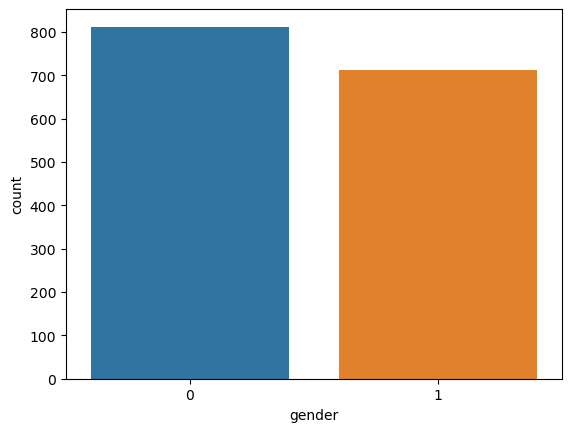

In [27]:
sns.countplot(x='gender', data=election)


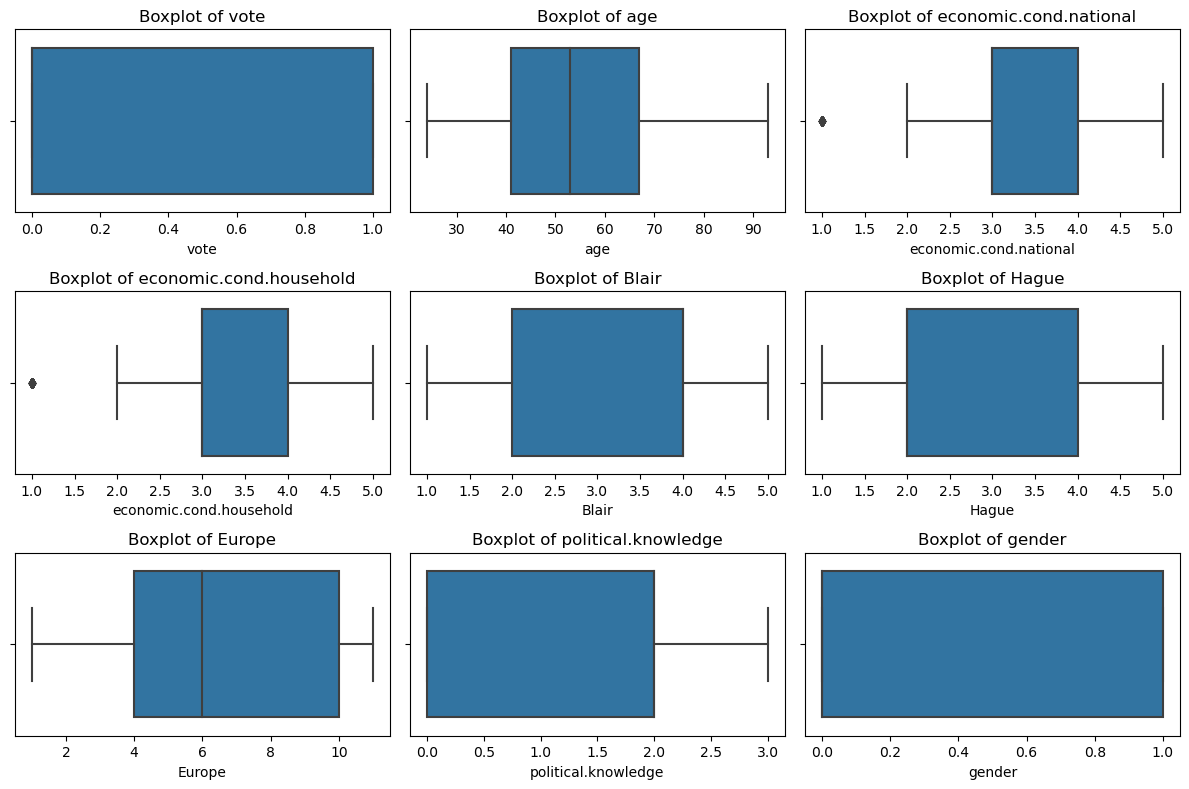

In [28]:
plt.figure(figsize = (12,8))
feature_list = election.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = election[feature_list[i]], data = election)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Bivariate Analysis:

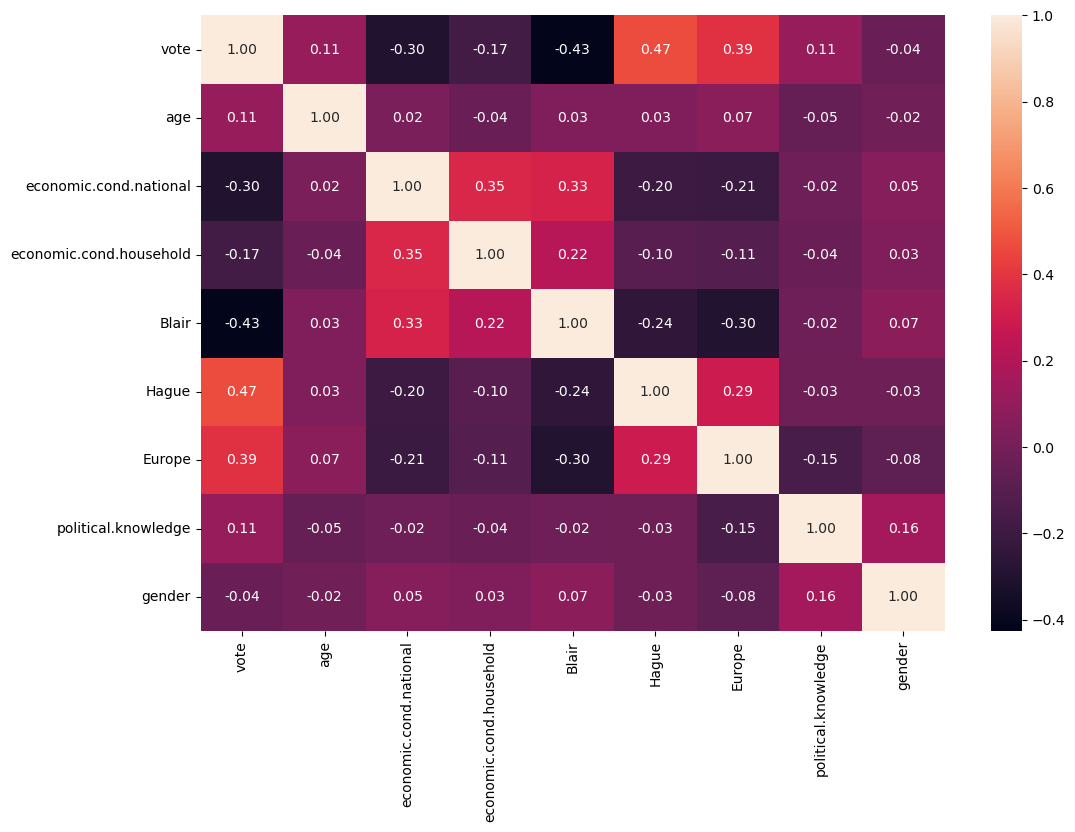

In [29]:
plt.figure(figsize = (12,8))
sns.heatmap(election.corr(), annot=True,fmt='.2f');

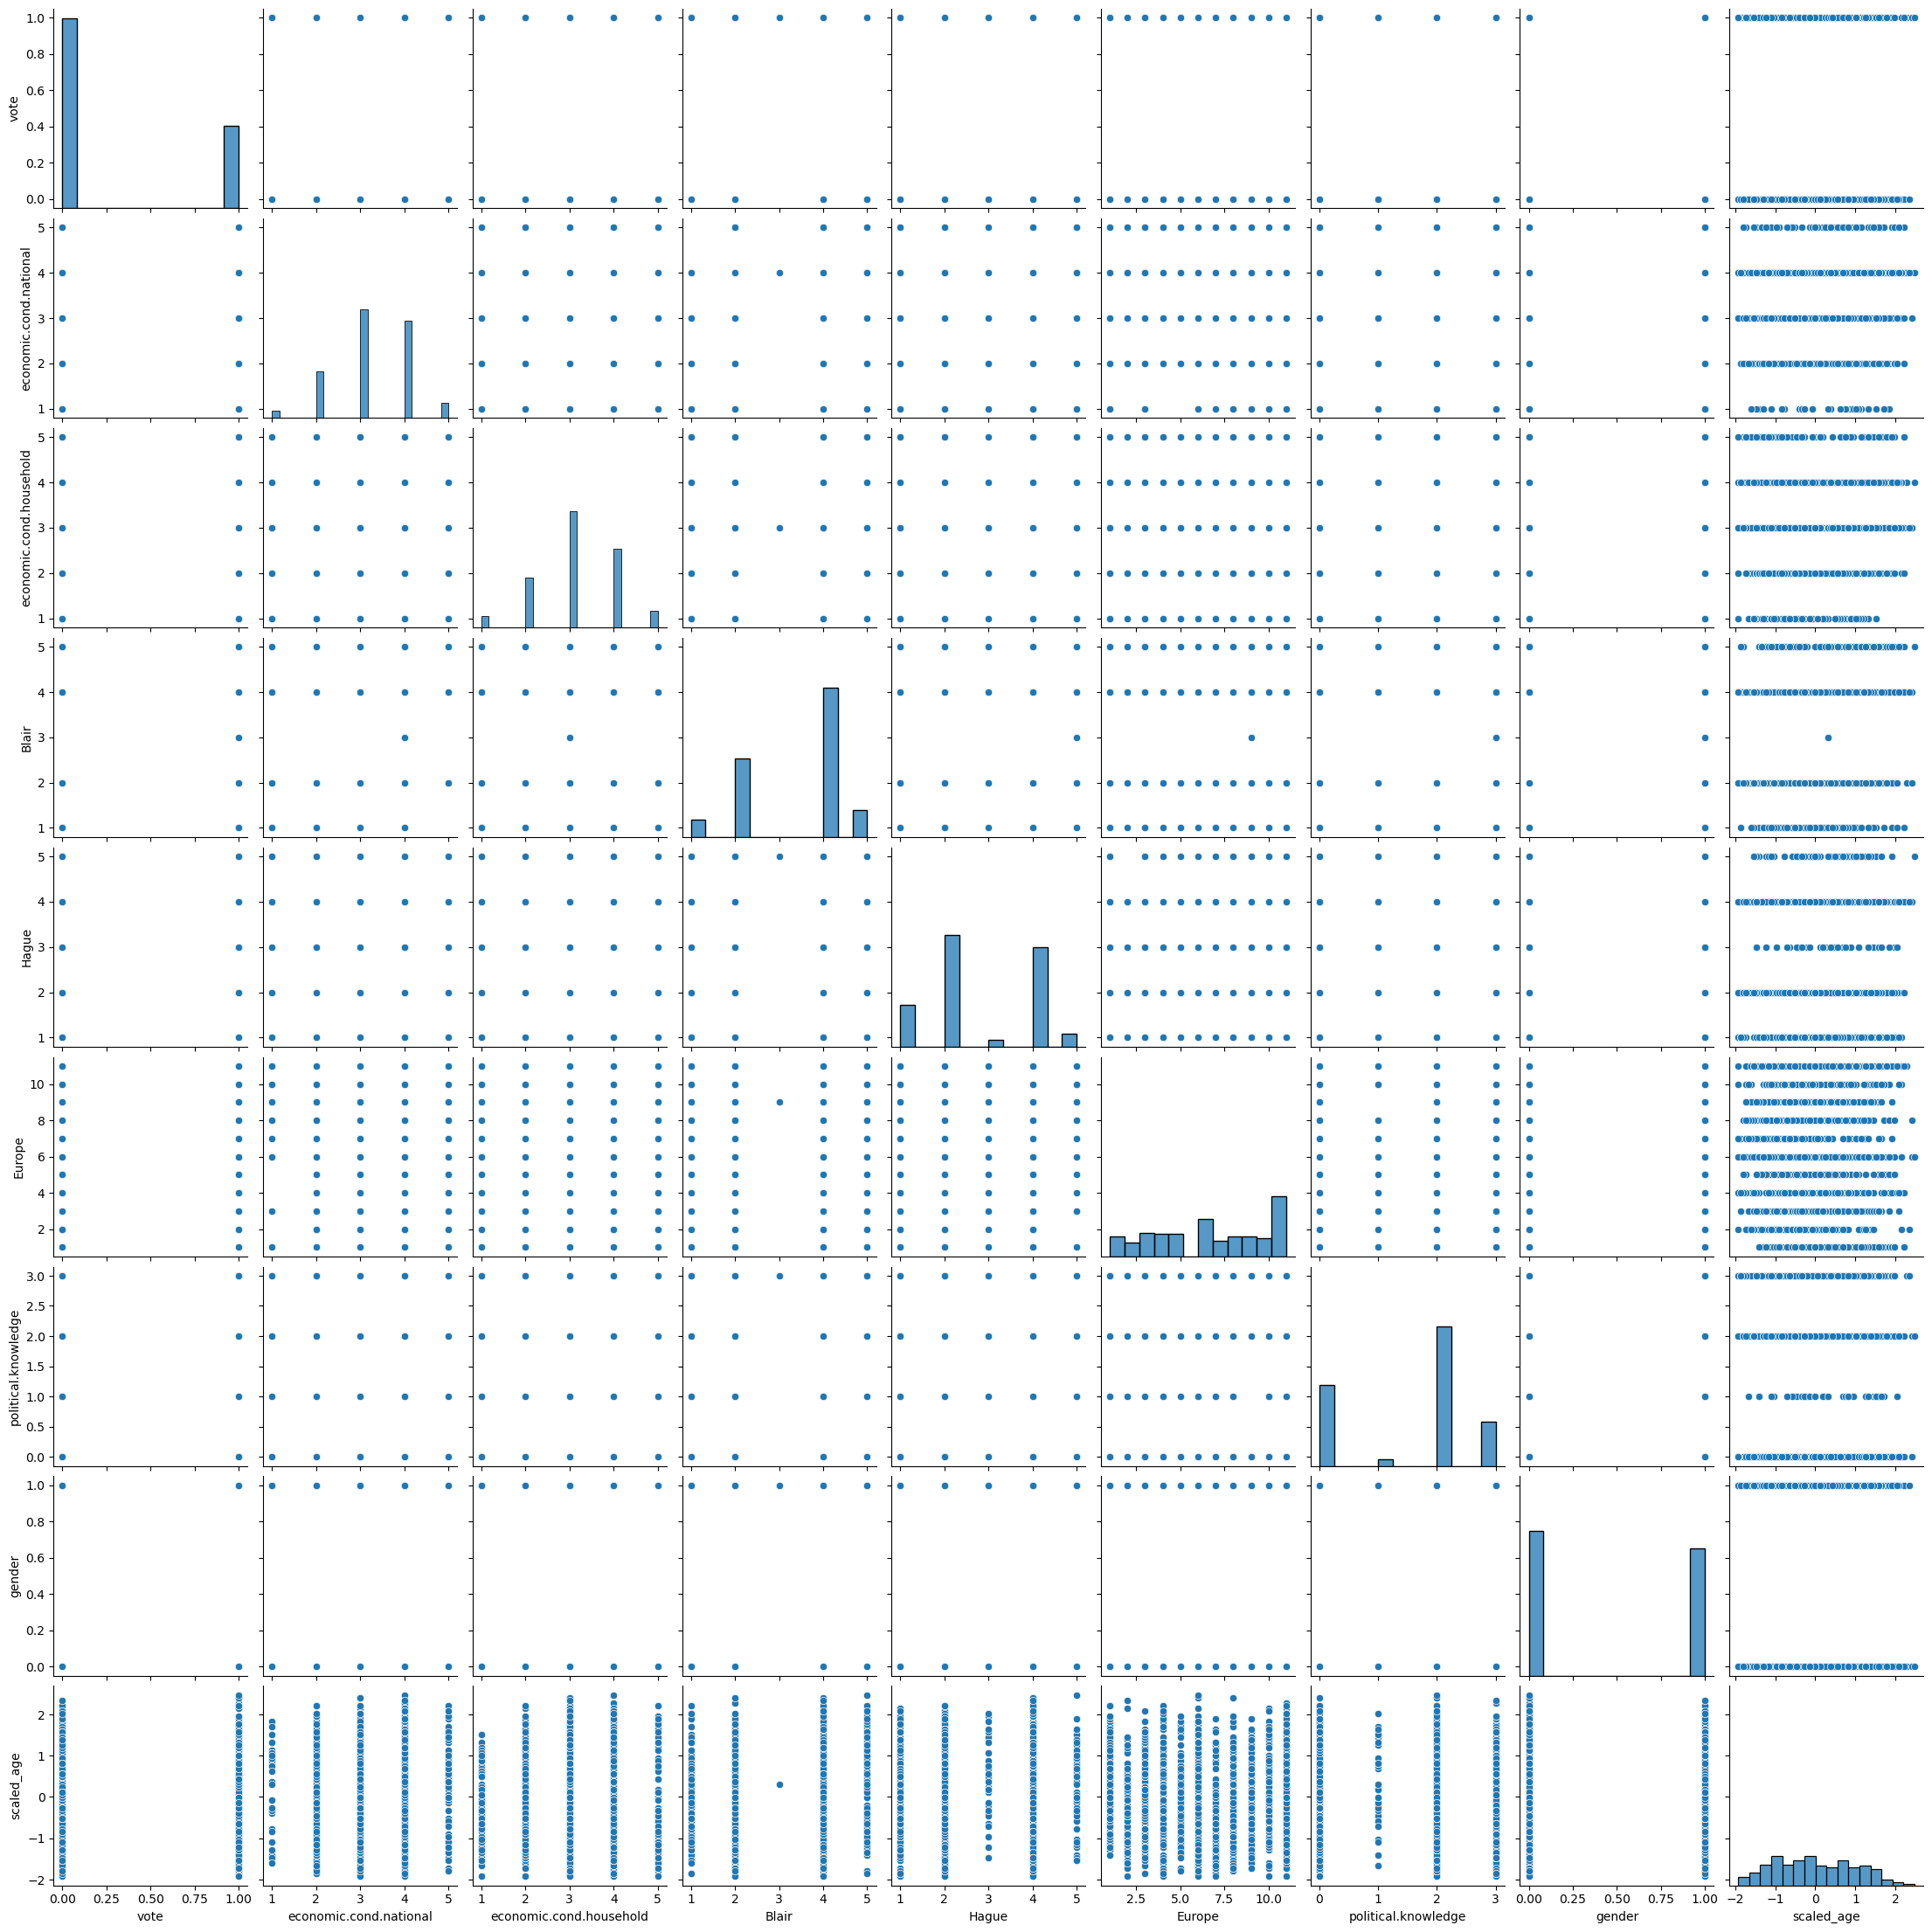

In [124]:
sns.pairplot(election)

<Axes: xlabel='Europe', ylabel='count'>

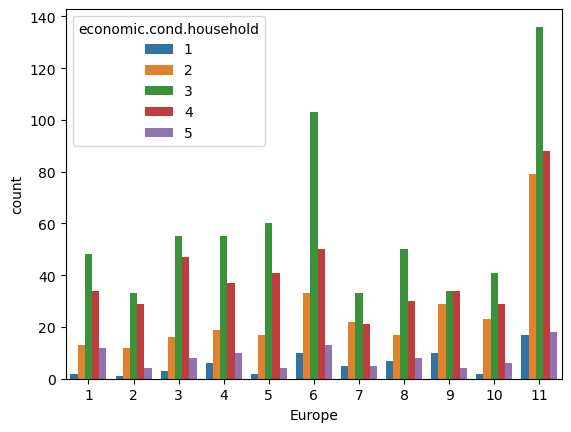

In [30]:
sns.countplot(data= election, hue='economic.cond.household',x='Europe')

<Axes: xlabel='Blair', ylabel='count'>

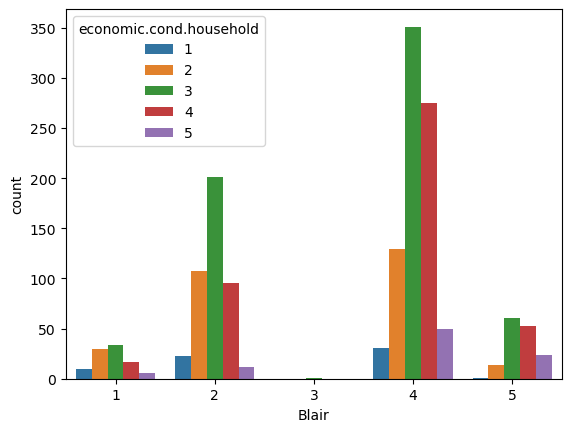

In [31]:
sns.countplot(data= election, hue='economic.cond.household',x='Blair')

<Axes: xlabel='Hague', ylabel='count'>

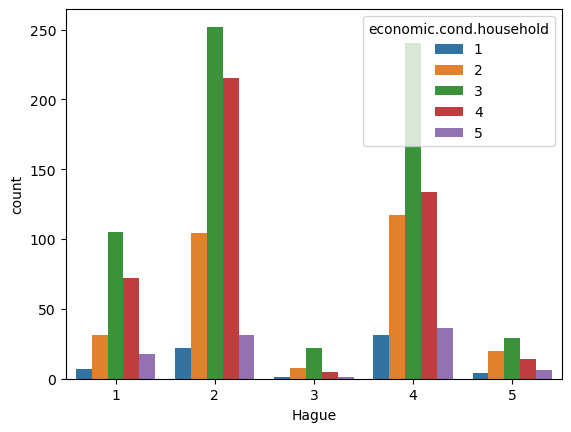

In [32]:
sns.countplot(data= election, hue='economic.cond.household',x='Hague')

<Axes: xlabel='Hague', ylabel='count'>

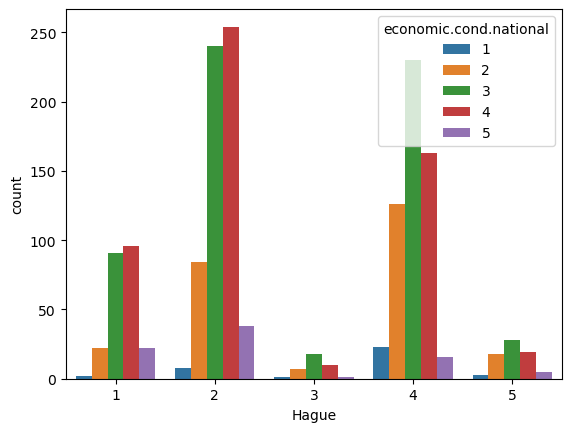

In [33]:
sns.countplot(data= election, hue='economic.cond.national',x='Hague')

<Axes: xlabel='Blair', ylabel='count'>

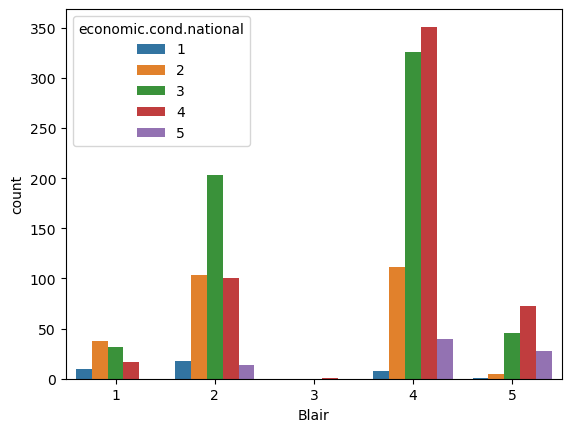

In [34]:
sns.countplot(data= election, hue='economic.cond.national',x='Blair')

<Axes: xlabel='Hague', ylabel='count'>

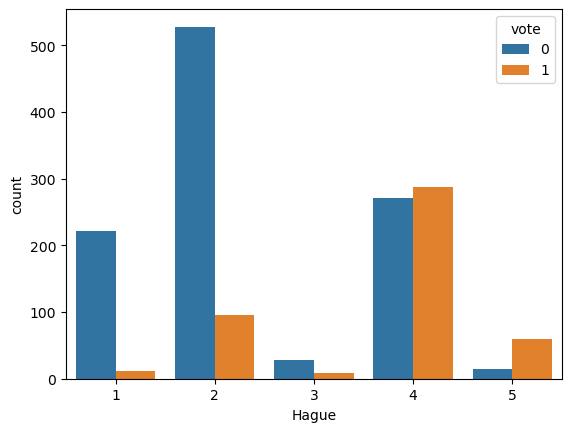

In [35]:
sns.countplot(data= election, hue='vote',x='Hague')

<Axes: xlabel='Blair', ylabel='count'>

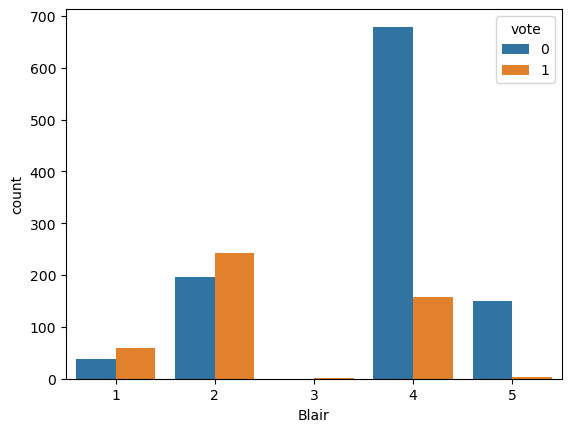

In [36]:
sns.countplot(data= election, hue='vote',x='Blair')

<Axes: xlabel='Hague', ylabel='count'>

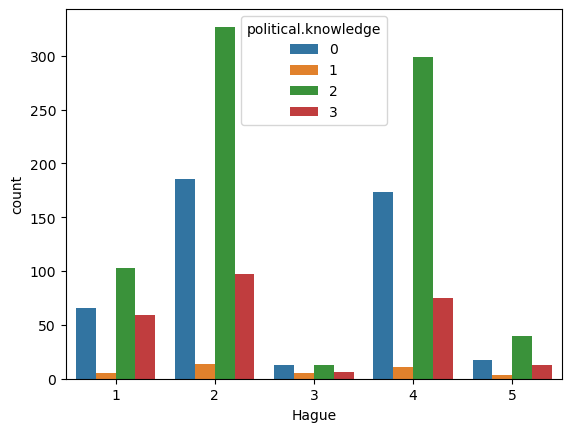

In [37]:
sns.countplot(data= election, hue='political.knowledge',x='Hague')

<Axes: xlabel='Blair', ylabel='count'>

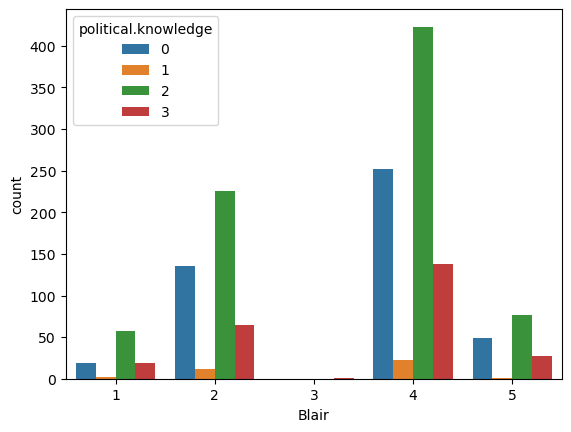

In [38]:
sns.countplot(data= election, hue='political.knowledge',x='Blair')

<Axes: xlabel='Blair', ylabel='Count'>

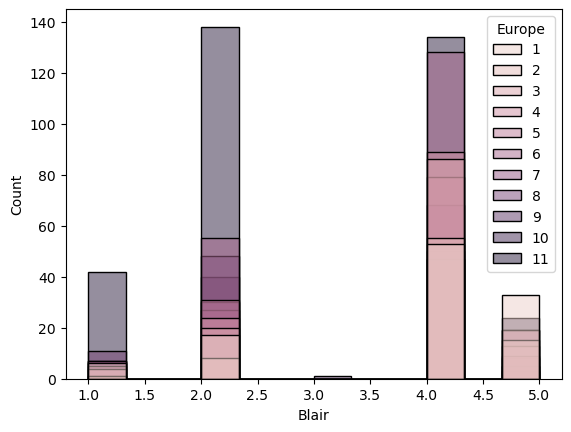

In [39]:
sns.histplot(data =election, x = "Blair", hue = "Europe")

<Axes: xlabel='Hague', ylabel='Count'>

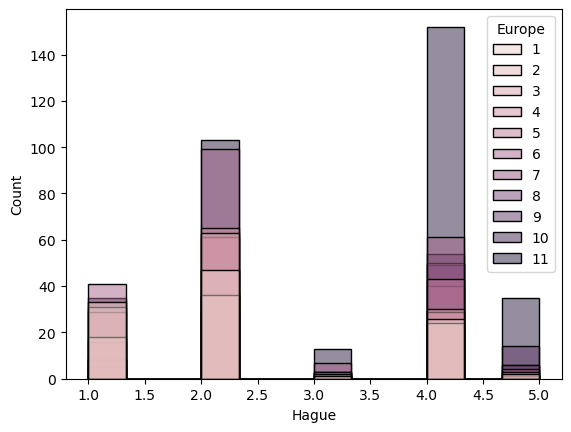

In [40]:
sns.histplot(data =election,hue = "Europe", x = "Hague")

Scaling:


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler= StandardScaler()

In [43]:
election['scaled_age'] = scaler.fit_transform(election[['age']])

In [44]:
election

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,scaled_age
1,0,43,3,3,4,1,2,2,0,-0.711973
2,0,36,4,4,4,4,5,2,1,-1.157661
3,0,35,4,4,5,2,3,2,1,-1.221331
4,0,24,4,2,2,1,4,0,0,-1.921698
5,0,41,2,2,1,1,6,2,1,-0.839313
...,...,...,...,...,...,...,...,...,...,...
1521,1,67,5,3,2,4,11,3,1,0.816100
1522,1,73,2,2,4,4,8,2,1,1.198118
1523,0,37,3,3,5,4,2,2,1,-1.093992
1524,1,61,3,3,1,4,11,2,1,0.434081


In [45]:
election.drop('age', inplace=True, axis=1)

In [46]:
election

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,scaled_age
1,0,3,3,4,1,2,2,0,-0.711973
2,0,4,4,4,4,5,2,1,-1.157661
3,0,4,4,5,2,3,2,1,-1.221331
4,0,4,2,2,1,4,0,0,-1.921698
5,0,2,2,1,1,6,2,1,-0.839313
...,...,...,...,...,...,...,...,...,...
1521,1,5,3,2,4,11,3,1,0.816100
1522,1,2,2,4,4,8,2,1,1.198118
1523,0,3,3,5,4,2,2,1,-1.093992
1524,1,3,3,1,4,11,2,1,0.434081


In [47]:
X = election.drop('vote', axis=1)
y = election[['vote']]

In [48]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [49]:
X_train.shape, train_labels.shape

((1067, 8), (1067, 1))

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,accuracy_score, roc_curve, roc_auc_score, confusion_matrix,classification_report


In [51]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train,train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [52]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [53]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.066352,0.933648
1,0.310807,0.689193
2,0.666519,0.333481
3,0.522593,0.477407
4,0.842848,0.157152


In [54]:
# Accuracy - Training Data
model.score(X_train, train_labels)

0.8406747891283973

AUC: 0.889


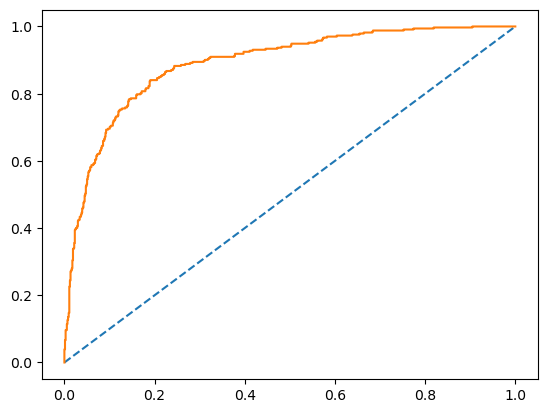

In [55]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [56]:
model.score(X_test, test_labels)

0.8231441048034934

AUC: 0.889


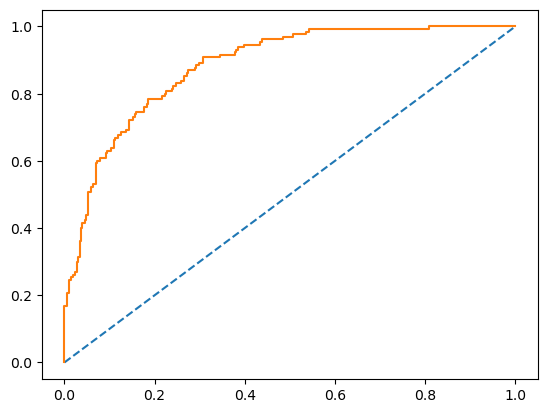

In [57]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [58]:
confusion_matrix(train_labels, ytrain_predict)

array([[667,  68],
       [102, 230]])

In [59]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [60]:
confusion_matrix(test_labels, ytest_predict)

array([[292,  36],
       [ 45,  85]])

In [61]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [62]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [63]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [64]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [65]:
grid_search.fit(X_train, train_labels)

/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pavithra/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [66]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [67]:
best_model = grid_search.best_estimator_

In [68]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [69]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.067696,0.932304
1,0.311187,0.688813
2,0.665756,0.334244
3,0.522957,0.477043
4,0.839674,0.160326


In [70]:
best_model.score(X_train, train_labels)

0.8397375820056232

In [71]:
best_model.score(X_test, test_labels)

0.8231441048034934

LDA

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [73]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,train_labels)

In [74]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

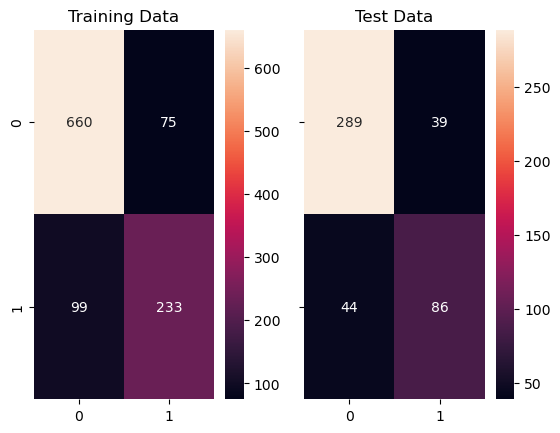

In [75]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(train_labels,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(test_labels,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [76]:
print('Classification Report of the training data:\n\n',metrics.classification_report(train_labels,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(test_labels,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



In [77]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.884


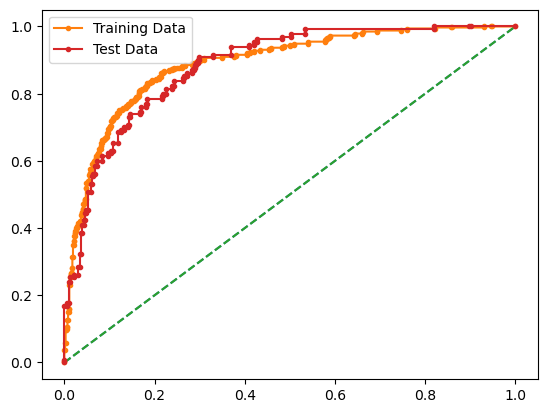

In [78]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(train_labels,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [79]:
clf.intercept_ 

array([-2.61426426])

In [80]:
clf.coef_

array([[-0.34920682, -0.1503469 , -0.70441972,  0.96718782,  0.25856319,
         0.57234288, -0.24908203,  0.40241615]])

In [81]:
X.columns

Index(['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague',
       'Europe', 'political.knowledge', 'gender', 'scaled_age'],
      dtype='object')

In [82]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.35, -0.15, -0.7 ,  0.97,  0.26,  0.57, -0.25,  0.4 ]])

**KNN:**

In [83]:
from sklearn.neighbors import KNeighborsClassifier


In [84]:
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 31))  # A range of k values to test
best_k = None
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, train_labels, cv=5)  # 5-fold cross-validation
    accuracy = scores.mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k}")


Best k: 19


In [85]:
NNH = KNeighborsClassifier(n_neighbors= 19, weights = 'uniform' )

In [86]:
NNH.fit(X_train, train_labels)

KNeighborsClassifier(n_neighbors=19)

In [87]:
predicted_labels = NNH.predict(X_test)

In [88]:
NNH.score(X_train, train_labels)

0.8416119962511716

In [89]:
NNH.score(X_test, test_labels)

0.8144104803493449

In [90]:
from sklearn import metrics

print(metrics.confusion_matrix(test_labels, predicted_labels))

[[284  44]
 [ 41  89]]


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=19)  # Adjust the number of neighbors (k) as needed
knn.fit(X_train, train_labels)
knn_train_accuracy = accuracy_score(train_labels, knn.predict(X_train))
knn_test_accuracy = accuracy_score(test_labels, knn.predict(X_test))

# Naïve Bayes
nb = GaussianNB()  
nb.fit(X_train, train_labels)
nb_train_accuracy = accuracy_score(train_labels, nb.predict(X_train))
nb_test_accuracy = accuracy_score(test_labels, nb.predict(X_test))

# Interpretation and discussion of the results


print(f"KNN Train Accuracy: {knn_train_accuracy:.2f}")
print(f"KNN Test Accuracy: {knn_test_accuracy:.2f}")
print(f"Naïve Bayes Train Accuracy: {nb_train_accuracy:.2f}")
print(f"Naïve Bayes Test Accuracy: {nb_test_accuracy:.2f}")


KNN Train Accuracy: 0.84
KNN Test Accuracy: 0.81
Naïve Bayes Train Accuracy: 0.83
Naïve Bayes Test Accuracy: 0.83


**Naive Bayes Theorem:**

In [92]:
from sklearn.naive_bayes import GaussianNB


In [93]:
model = GaussianNB()
model.fit(X_train, train_labels)
print(model)
# make predictions
print(confusion_matrix(model.predict(X_test),test_labels))
print(classification_report(model.predict(X_test),test_labels))

GaussianNB()
[[284  36]
 [ 44  94]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       320
           1       0.72      0.68      0.70       138

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.82      0.83      0.82       458



In [94]:
print(confusion_matrix(model.predict(X_train),train_labels))
print(classification_report(model.predict(X_train),train_labels))

[[649  92]
 [ 86 240]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       741
           1       0.72      0.74      0.73       326

    accuracy                           0.83      1067
   macro avg       0.80      0.81      0.80      1067
weighted avg       0.83      0.83      0.83      1067



AUC for the Training Data: 0.889
AUC for the Test Data: 0.884


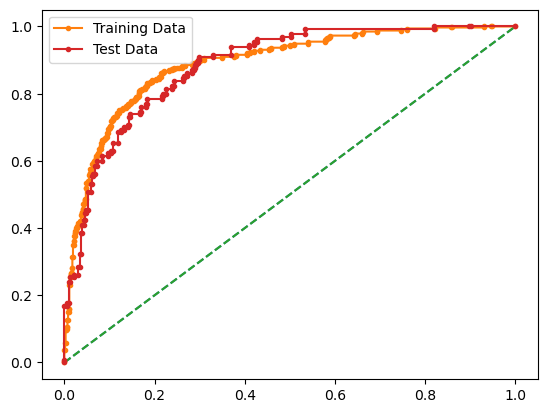

In [95]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(train_labels,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Data Tuning:**

Ensemble Learning - AdaBoosting

In [96]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, train_labels)


0.8231441048034934


<Axes: >

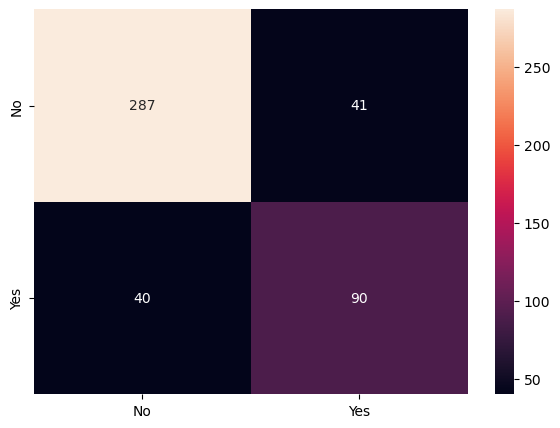

In [97]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , test_labels))

cm=metrics.confusion_matrix(test_labels, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



 Ensemble Learning - GradientBoost

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, train_labels)


0.8362445414847162


<Axes: >

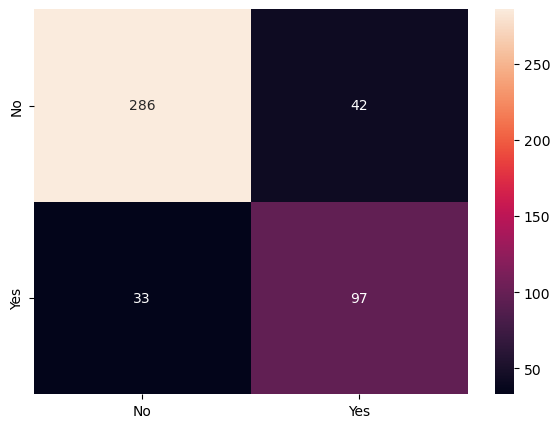

In [99]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, test_labels))
cm=metrics.confusion_matrix(test_labels, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [101]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [102]:
ADB_model=AdaBoostClassifier()


In [103]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)


In [104]:
grid_search.fit(X_train,train_labels)


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [105]:
ADB_model=grid_search.best_estimator_


In [106]:
ADB_model.fit(X_train,train_labels)


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000)

In [107]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, train_labels)
print(model_score)
print(confusion_matrix(train_labels, y_train_predict))
print(classification_report(train_labels, y_train_predict))

0.8350515463917526
[[674  61]
 [115 217]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       735
           1       0.78      0.65      0.71       332

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



AUC: 0.902


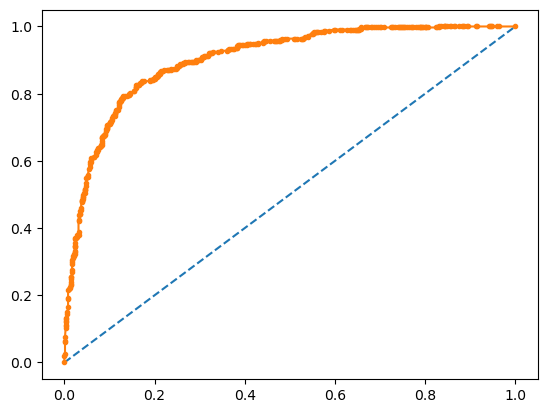

In [108]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [109]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, test_labels)
print(model_score)
print( confusion_matrix(test_labels, y_test_predict))
print( classification_report(test_labels, y_test_predict))

0.8318777292576419
[[296  32]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       328
           1       0.73      0.65      0.69       130

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.893


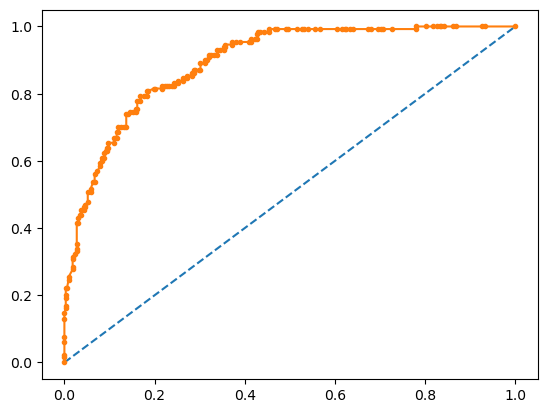

In [110]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**Random Forest**


In the following blocks of codes, we will first start with building a random forest model. Finally, we will explore how to tune the hyperparameters (e.g. n_estimators and max_features) of the random forest algorithm.

We first start by importing the necessary libraries and assigning the random forest classifier to the rf variable.

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=5, n_estimators=100)

In [112]:
rf.fit(X_train, train_labels)

RandomForestClassifier(max_features=5)

In [113]:
rf.score(X_test, test_labels)

0.8100436681222707

Now we will be performing the tuning of hyperparameters of Random forest model. The hyperparameters that we will tune includes max_features and the n_estimators.

Note: Some codes modified from scikit-learn

Firstly, we will import the necessary modules.

The GridSearchCV() function from scikit-learn will be used to perform the hyperparameter tuning. Particularly, GridSearchCV() function can perform the typical functions of a classifier such as *fit, score* and *predict* as well as *predict_proba, decision_function, transform* and *inverse_transform*.

Secondly, we define variables that are necessary input to the GridSearchCV() function.

In [114]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [115]:
grid.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [116]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 2, 'n_estimators': 150} with a score of 0.83


**Bagging**

Train using stand alone model


In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.73442623, 0.78360656, 0.75737705, 0.76721311, 0.73770492])

In [118]:
scores.mean()

0.7560655737704919

In [119]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, train_labels)
bag_model.oob_score_

0.8163074039362699

In [120]:
bag_model.score(X_test, test_labels)


0.8122270742358079

In [121]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

array([0.80983607, 0.81311475, 0.8295082 , 0.82622951, 0.82295082])

In [122]:
scores.mean()


0.8203278688524591

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    # Add other hyperparameters as needed
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    # Add other hyperparameters as needed
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, train_labels)

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5)
grid_search_gb.fit(X_train, train_labels)

# Get the best hyperparameters from grid search
best_params_rf = grid_search_rf.best_params_
best_params_gb = grid_search_gb.best_params_

# Build Random Forest and Gradient Boosting models with best hyperparameters
rf_model = RandomForestClassifier(**best_params_rf)
rf_model.fit(X_train, train_labels)

gb_model = GradientBoostingClassifier(**best_params_gb)
gb_model.fit(X_train, train_labels)

# Evaluate model performances on the testing data
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(test_labels, y_pred_rf)

y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(test_labels, y_pred_gb)

# Comment on model performances and feature importance (if applicable)
# ...

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")


Random Forest Accuracy: 0.82
Gradient Boosting Accuracy: 0.82
